# Visualization

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
 [py.warnings]


In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')

In [5]:
inp_current = np.array([inp_cur1, inp_cur2])
inp_current

array([[ 0.        , -0.01416314,  0.06263459, ..., -0.44478035,
        -0.39163954, -0.33014548],
       [ 0.        ,  0.39594954,  0.27878635, ..., -0.55344109,
        -0.71057181, -0.62256885]])

In [6]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
# out_spikes

## Define Model

In [7]:
# res={'taut': 0.038281479669330376,
#  'R': 8084051733.384311,
#  'D': 0.0025722558443824674,
#  'a': 0.08427460573972566,
#  'tau': 0.01007468391773357,
#  'alpha': 1.4880312994647356}



In [8]:
res={'taut': 0.03940264530424703,
 'tau': 0.019428036380643388,
 'alpha': 1.0694762113655902,
 'R': 13154191074.086367,
 'a': 0.09021720088860954,
 'D': 0.00047695430996046867}

In [9]:

model = '''
        dv/dt = (R*I(t, i)- v)/tau : 1
        dvt/dt = (a*v - vt) / taut :1
        alpha : 1 (constant)
        a : 1 (constant)
        R : 1/amp (constant)
        tau : second (constant)
        taut : second (constant)
        D : second(constant)
        '''

reset = '''
v = 0
vt = vt + alpha
'''

In [10]:
I = TimedArray(inp_current.transpose()*nA, dt=dt)

In [11]:
start_scope()
G = NeuronGroup(2, model,
                threshold='v > 1 + vt',
                reset=reset,
                refractory='D',
                method='exponential_euler')

G.set_states(res, units=False)
mon = StateMonitor(G, ['v', 'vt'], record=True)
spike_mon = SpikeMonitor(G)

In [12]:
run(50*second)

In [13]:
fits = mon.v[:]
fits_vt = mon.vt[:]

In [14]:
all_values = spike_mon.all_values()
spikes1 = all_values['t'][0]/ms
spikes2 = all_values['t'][1]/ms

In [15]:
t0 = np.arange(0, len(fits[0]))*dt/ms

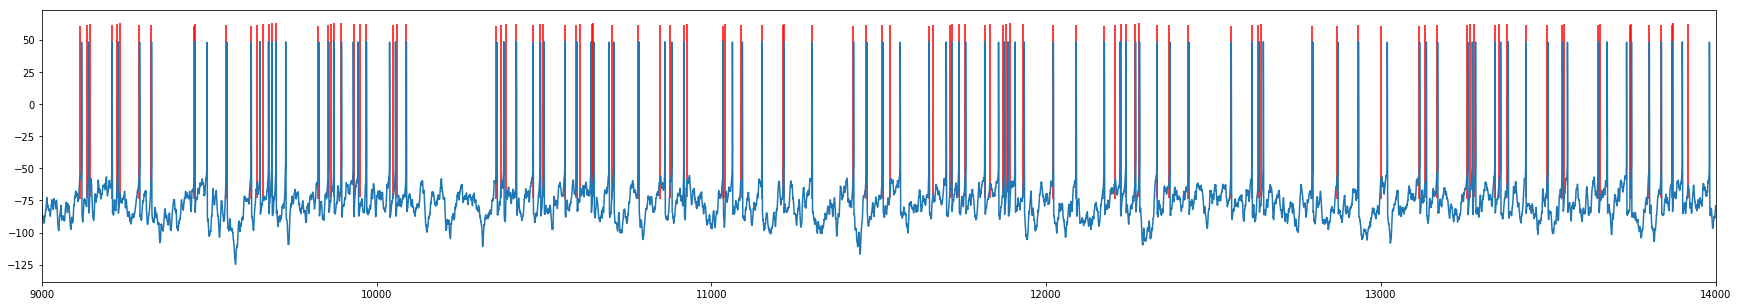

In [16]:
plt.figure(figsize=(30,5))
# plot(t0, fits[0].transpose());
vlines(spikes1, fits[0][np.int_(np.round(spikes1/dt*ms))]-75, fits[0][np.int_(np.round(spikes1/dt*ms))]+60, 'r');
plot(t0, voltage1[:5000000]);
xlim(9000, 14000);

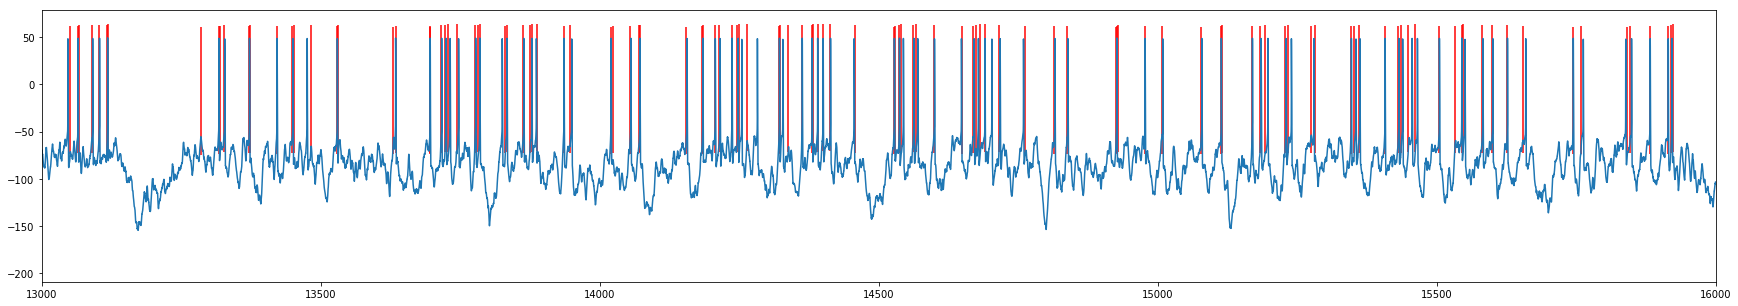

In [17]:
plt.figure(figsize=(30,5))
# plot(t0, fits[0].transpose());
vlines(spikes2, fits[1][np.int_(np.round(spikes2/dt*ms))]-75, fits[1][np.int_(np.round(spikes2/dt*ms))]+60, 'r');
plot(t0, voltage2[:5000000]);
xlim(13000, 16000);

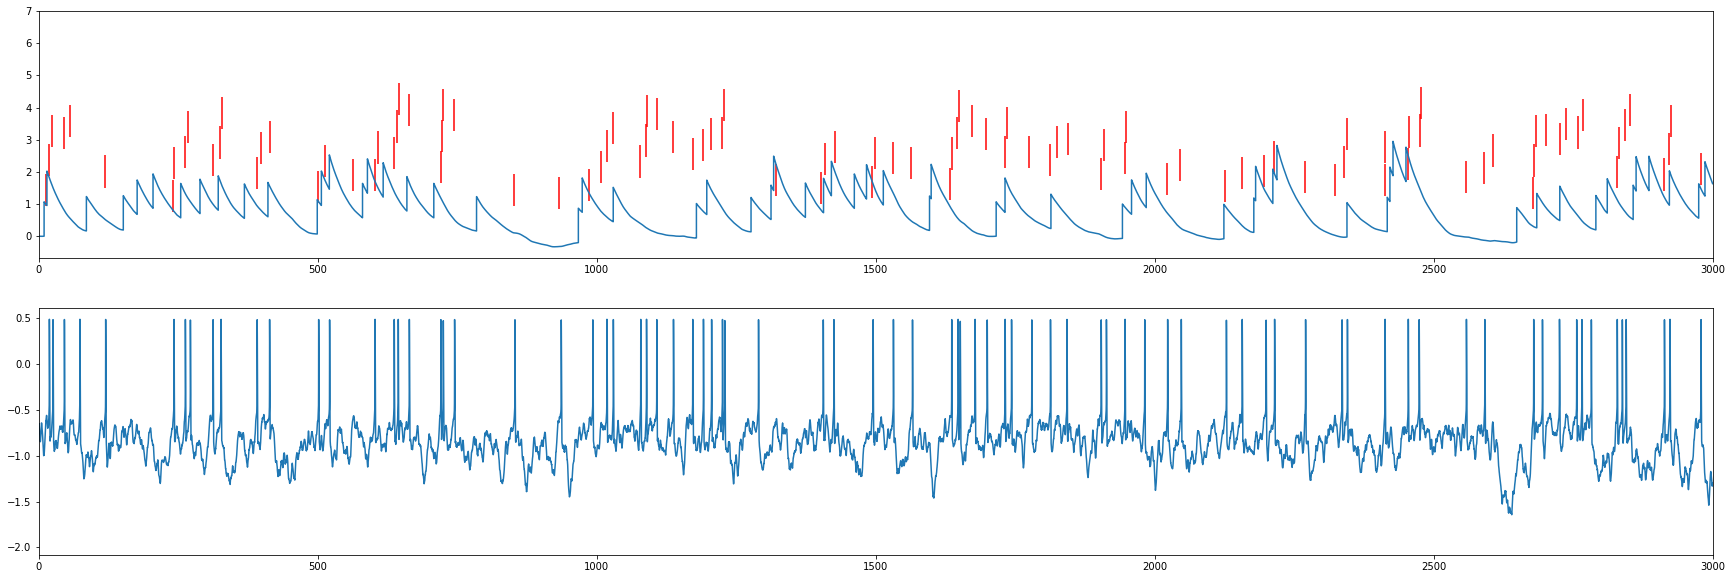

In [18]:
d0, d1 = 0, 3000
fig, ax =plt.subplots(nrows=2, figsize=(30, 10))

# ax[0].plot(t0, fits[0].transpose());
ax[0].plot(t0, fits_vt[0].transpose());
ax[0].vlines(spikes2, fits[1][np.int_(np.round(spikes2/dt*ms))], fits[1][np.int_(np.round(spikes2/dt*ms))]+1, 'r');
ax[1].plot(t0, voltage2/100);

ax[0].set_xlim(d0, d1);
ax[1].set_xlim(d0, d1);